<a href="https://colab.research.google.com/github/kangahdesmond/-MY-MATLAB-CODES/blob/main/Prediction_with_K_Nearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SALARY_ESTIMATION_USING_K-NN***

***Importing Libraries***

In [ ]:
import numpy as np                                                                #used to perform array or matrix
import pandas as pd                                                               #Useful for loading dataset
import matplotlib.pyplot as plt                                                   #useful for ploting graphs

***Loading data from local directory***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


***Load dataset***

In [ ]:
dataset = pd.read_csv('salary.csv')

***Showing the dataset***

In [ ]:
print(dataset.shape)
print(dataset.head(10))
print(dataset)

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
5   34              9             0              45  <=50K
6   38              6             0              40  <=50K
7   74             16             0              20   >50K
8   68              9             0              40  <=50K
9   41             10             0              60   >50K
       age  education.num  capital.gain  hours.per.week income
0       90              9             0              40  <=50K
1       82              9             0              18  <=50K
2       66             10             0              40  <=50K
3       54              4             0              40  <=50K
4       41             10

***Mapping the Salary Data to Binary Value***

In [ ]:
income_set = set(dataset['income'])                                               #gets the unique values un the income column
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)    #it maps the <=50 to 0 and >50k to 1 in the column, .astype (converts the values in the income column to integers)
print(dataset['income'])

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64


***Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)***

In [10]:
X = dataset.iloc[:, :-1].values   #iloc (interger location) is a method to select all rows and :-1 means, it should exclude the last column
Y = dataset.iloc[:, -1].values   #iloc (interger location) is a method to select all rows and -1 means, it should select only the last column

***Selecting data into training and testing***

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)  #It splits the dataset into four parts: X_train, X_test, Y_train, and Y_test
#The random_state ensures that the split is the same every time you run the code,

***Feature Scaling ***

*We scale our data to make all the features contribute equally to the result*

**Fit_Transform** - fit method is calculating the mean and the variance of each of the features in our data
**Transform** - it is for transforming all the features using the respective mean and variance
***We want our test data to be a completely new and a surprise set for our model***

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Find the K-Value***

Text(0, 0.5, 'Mean Error')

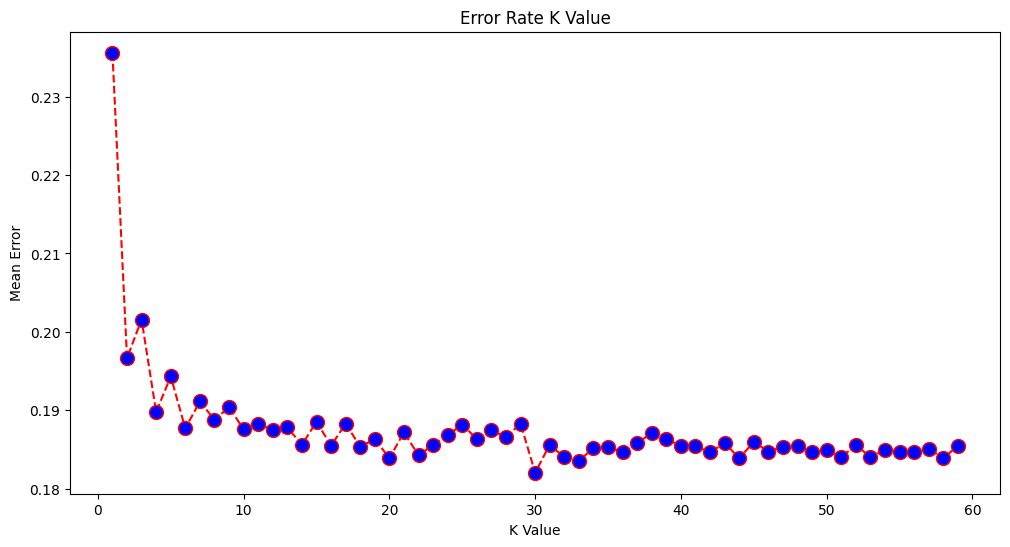

In [23]:
from os import error
error = []    #This line initializes an empty list named error. This list will be used to store the error rates for different values of K.
from sklearn.neighbors import KNeighborsClassifier # This line imports the KNeighborsClassifier class from the sklearn.neighbors module. This class is used to create a KNN classifier object.
import matplotlib.pyplot as plt #This line imports the pyplot module from the matplotlib library and assigns it to the alias plt. This module is used for plotting graphs.

#Calculating the error for K values between 1 and 40
for i in range(1, 60):                          #This line starts a for loop that iterates over the numbers from 1 to 39 (40 is not included). The loop variable i will take on each of these values in turn.
  model = KNeighborsClassifier(n_neighbors=i)  #This line creates a KNN classifier object with the specified number of neighbors (i) and assigns it to the variable model.
  model.fit(X_train, Y_train)                   #This line fits the KNN classifier model to the training data (X_train and Y_train). The model learns the patterns and relationships in the training data.
  pred_i = model.predict(X_test)                #This line uses the trained KNN classifier model to make predictions on the test data (X_test). The predictions are stored in the variable pred_i.
  error.append(np.mean(pred_i != Y_test))       #This line calculates the mean error rate by comparing the predicted values (pred_i) with the actual test values (Y_test). The error rate is appended to the error list.

plt.figure(figsize=(12, 6))                      #This line creates a new figure with a specified size (12 inches by 6 inches).
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)       #This line plots the error rates against the K values. The plot is a red dashed line with blue circular markers.
plt.title('Error Rate K Value')                 #This line sets the title of the plot to "Error Rate K Value".
plt.xlabel('K Value')                            #This line sets the label for the x-axis to "K Value".
plt.ylabel('Mean Error')                         #This line sets the label for the y-axis to "Mean Error".

***Training the model***

In [24]:
model = KNeighborsClassifier(n_neighbors=58, metric= 'minkowski', p=2)    #This parameter sets the distance metric used to calculate the distance between points.
#The Minkowski distance is a generalization of the Euclidean and Manhattan distances. when p=1 meaning its manhanthan and when its 2, its Euclidean distance
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=58)

***Predicting whether New Customer with Age and Salary will Buy or Not***

In [16]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Captital Gain: "))
wh = int(input("Enter New Employee's Hour's Per week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
  print("Employee might got Salary above 50K")
else:
  print("Customer might not got  Salary above 50K")

Enter New Employee's Age: 90
Enter New Employee's Education: 9
Enter New Employee's Captital Gain: 0
Enter New Employee's Hour's Per week: 40
[0]
Customer might not got  Salary above 50K


***Prediction all the Test Data***

In [25]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),   #This line concatenates the predicted labels (y_pred) and the actual labels (Y_test) side by side to make it easier to compare them.
Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


***Evaluating the model using Confusion Matrix***

In [26]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Confusion Matrix: 
[[5876  317]
 [1180  768]]


In [28]:
print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, y_pred)*100))

Accuracy of the Model: 81.61159562707284%
